<a href="https://colab.research.google.com/github/NoahKKandie/dsc-data-serialization-lab/blob/master/Data_Driven_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Understanding:
The dataset contains information about bank customers, including demographic details, account balances, contact information, and previous campaign outcomes. Understanding customer behavior and preferences is crucial for banks to optimize marketing campaigns, improve customer satisfaction, and increase profitability. By analyzing this data, the bank can gain insights into customer demographics, preferences, and behaviors, enabling them to tailor their marketing strategies and services to better meet customer needs.



## Problem Statement:
The bank wants to leverage its customer data to improve marketing effectiveness and customer engagement. The specific objectives include:

1. **Understanding customer demographics**: Analyze the demographic characteristics of bank customers, such as age, education, and marital status, to identify key customer segments and their preferences.

2. **Predicting customer response to marketing campaigns**: Develop predictive models to forecast whether a customer is likely to respond positively to a marketing campaign based on their past interactions with the bank and other relevant factors.

3. **Identifying effective marketing channels**: Evaluate the performance of different communication channels (e.g., phone calls, emails) and campaign strategies to determine which channels and approaches are most effective in engaging customers and driving conversions.

4. **Improving customer retention**: Identify factors that influence customer churn and develop strategies to retain existing customers, such as offering personalized incentives or improving customer service.

data scource: https://drive.google.com/file/d/1YGlh6IUFhWQyaIFzA_FiwL2BC6A9_7fd/view?usp=drive_link

## Data Loading and Preview

In [1]:
# Libraries
import pandas as pd
import numpy as np

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score


In [2]:
bank = pd.read_csv('bank-full.csv',sep =';')
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Data Understanding

In [4]:
# Check the summaries of the numerical dataset
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
# check for nulls
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Data cleaning

In [6]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

No missing values what about duplicates

In [7]:
bank.duplicated().sum()

0

No duplicates either, outliers?

<Axes: >

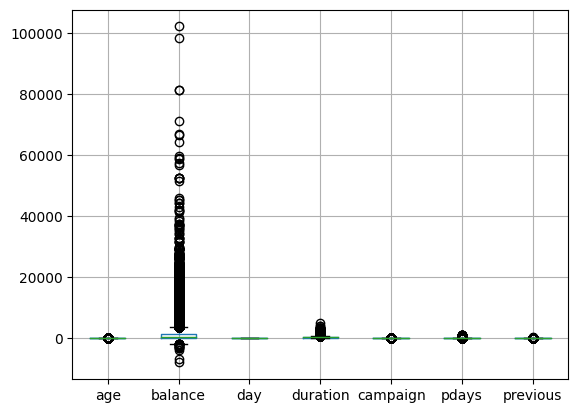

In [8]:
bank.boxplot()

In [9]:
# Extract numerical columns
numerical_columns = bank.select_dtypes(include=['int64']).columns
numerical_columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

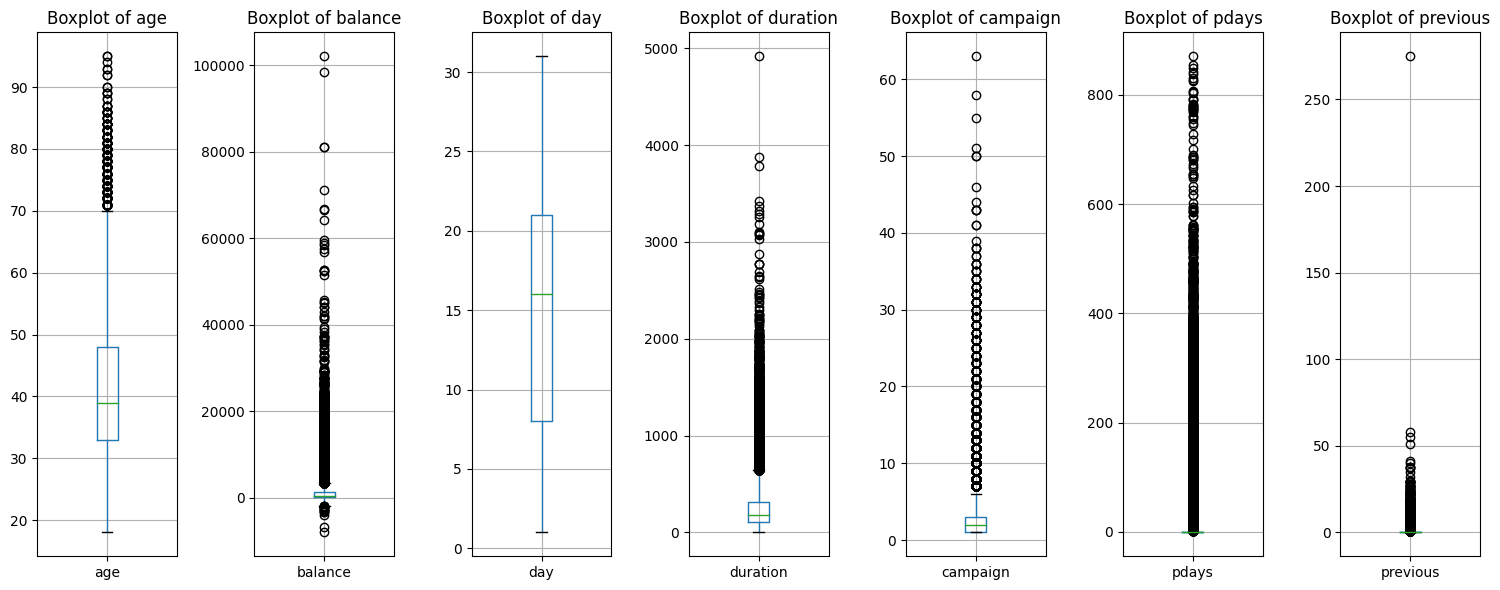

In [10]:
# Create subplots for each numerical column
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15, 6))

# Plot boxplots for each numerical column
for i, column in enumerate(numerical_columns):
    bank.boxplot(column=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

We can remove the outliers using Zscore when the data assumes a normal distribution and  Interquartile range, IQR, when the data is skewed.

For now, we will use it as it is. Some people have the *money!!!* in their account

Change datatype

In [11]:
# The day column is numeric but it represents a qualitative value, day.
bank.day =  bank['day'].astype(object)

## Exploratory Data Analysis

We will try and analyse our data to get more insights and visualise them


*Target variable*- ***Y***


In [12]:
bank['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

Text(0.5, 1.0, 'The dependent variable: Y')

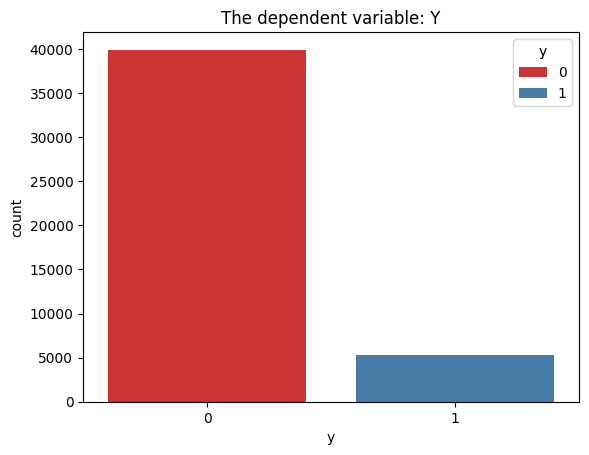

In [54]:
# Lets plot this
sns.countplot(data = bank, x= 'y' , palette = 'Set1' ,hue = 'y', legend = True )
plt.title('The dependent variable: Y')
#

There is a huge class imbalance, we will deal with this later in the notebook


Text(0.5, 1.0, 'Age Histogram')

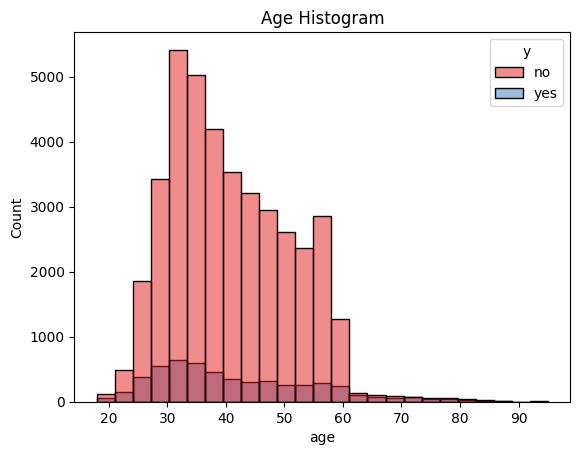

In [13]:
# Age analysis

sns.histplot(data = bank, x= 'age',bins = 25, hue = 'y',  palette='Set1') # the hue can age more insights btwn the 2 groups
plt.title( 'Age Histogram')

In [14]:
# Check the statistical summaries of the data
bank.describe()

,age,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


- The majority of customers fall within the range of 33 to 48 years, as indicated by the 25th, 50th (median), and 75th percentiles. While average age of customers is approximately 41 years.
- The account balance varies widely, with the minimum balance being negative and the maximum balance being quite high (102,127).There is a significant standard deviation, indicating a large variation in account balances among customers with mean 1,362.
- duration of the last contact with the customer during the current campaign ranges from 0 to 4,918 seconds.The average duration of the last contact is approximately 258 seconds. Similar to the account balance, there is a large standard deviation, indicating a wide range of contact durations.
- The majority of customers have been contacted fewer times, as indicated by the 25th and 50th percentiles.
- The majority of customers have not been contacted before, as indicated by the high number of zeros in the dataset.

<ipython-input-15-1324f2aad968>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y='age', data=bank,palette = 'Set1')


Text(0.5, 1.0, 'Age vs. Subscription')

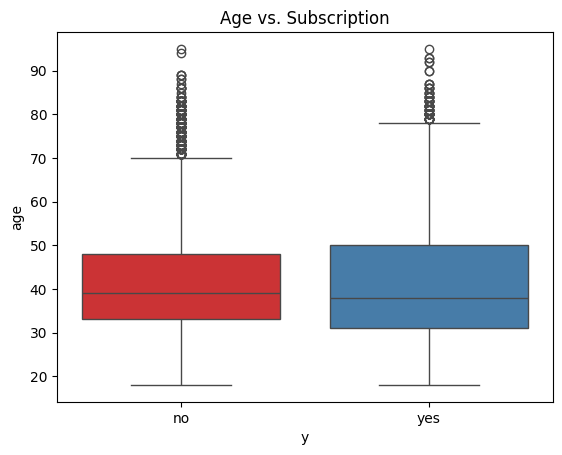

In [15]:
# Plot for numerical features
# Age
sns.boxplot(x='y', y='age', data=bank,palette = 'Set1')
plt.title('Age vs. Subscription')



Text(0.5, 1.0, 'Balance vs. Subscription')

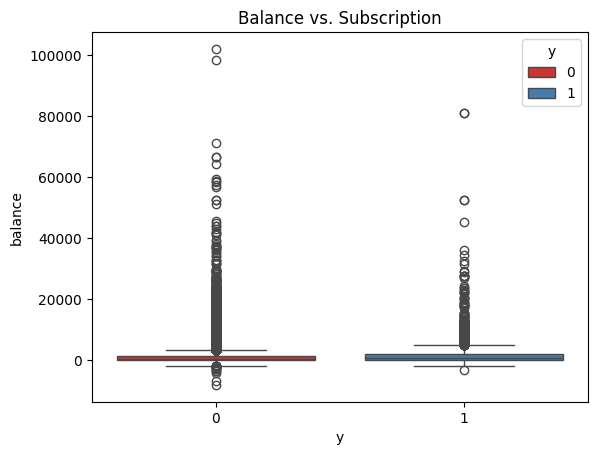

In [55]:
# Bank balance
sns.boxplot(x='y', y='balance', data=bank, palette ='Set1', hue = 'y')
plt.title('Balance vs. Subscription')

The plot above confirms the statistical summary above on balance


In [57]:
# Lets try and use groupby of the numerical columns
bank.groupby('y')[numerical_columns].mean()


<ipython-input-57-834dbe39fb40>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bank.groupby('y')[numerical_columns].mean()


,age,balance,duration,campaign,pdays,previous
y,,,,,,
0,40.838986,1303.714969,221.182806,2.846350,36.421372,0.502154
1,41.670070,1804.267915,537.294574,2.141047,68.702968,1.170354


It appears that customers who subscribed tend to be slightly older, have higher average balances, spend more time on the call, have been contacted less frequently during the current campaign, have a longer time since the last contact, and have a higher number of previous contacts compared to those who did not subscribe.

In [58]:
# Lets try and use groupby of the categorical columns
bank.groupby('y')[non_numeric_cols].count()


,job,marital,education,contact,day,month,poutcome
y,,,,,,,
0,39922,39922,39922,39922,39922,39922,39922
1,5289,5289,5289,5289,5289,5289,5289


It appears that the distribution of unique values for most categorical features is similar between the two groups, with the exception of the job feature, where customers who subscribed seem to have fewer unique job categories compared to those who did not subscribe.

### Job vs Y

In [61]:
pd.crosstab(bank['job'],bank['y'], normalize  = 0)

y,0,1
job,,
admin.,0.877973,0.122027
blue-collar,0.927250,0.072750
entrepreneur,0.917283,0.082717
housemaid,0.912097,0.087903
management,0.862444,0.137556
retired,0.772085,0.227915
self-employed,0.881571,0.118429
services,0.911170,0.088830
student,0.713220,0.286780


Among customers in the "Admin." job category, approximately 87.80% did not subscribe (y=0), while approximately 12.20% subscribed (y=1). Similarly, among customers in the "Student" job category, approximately 71.32% did not subscribe (y=0), while approximately 28.68% subscribed (y=1).

<Axes: xlabel='count', ylabel='job'>

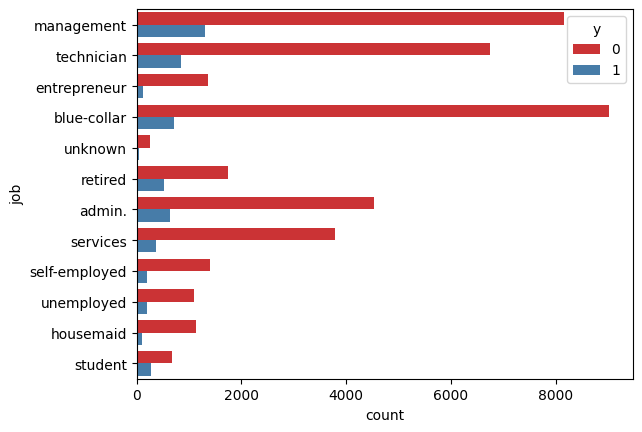

In [70]:
sns.countplot(data = bank, y= 'job', hue = 'y', orient = 'v',
              palette = 'Set1')

The top job category among customers who subscribed (y=1) is "Student," followed by "Retired," "Unemployed," "Management," and "Admin." These job categories have the highest subscription rates and may represent key target segments for the bank's marketing efforts.

Text(0.5, 1.0, 'Education vs Y')

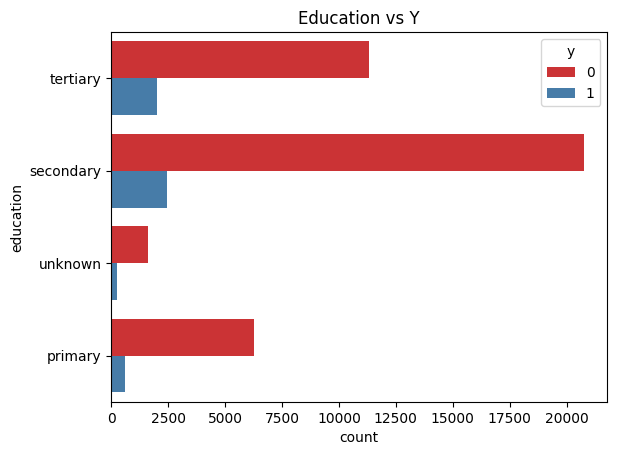

In [76]:
sns.countplot(data = bank, y= 'education', hue = 'y', orient = 'v',
              palette = 'Set1')
plt.title('Education vs Y')

### Marriage
Plot for categorical features

In [20]:
#Jobs Crosstab
x = pd.crosstab(bank['marital'],bank['y'],normalize = 0 )   # 0 = row/ 1 =column
x
# Try out other fields as well

y,no,yes
marital,,
divorced,0.880545,0.119455
married,0.898765,0.101235
single,0.850508,0.149492


Married customers have the highest proportion of subscribers (10.12%), followed by single customers (14.95%) and divorced customers (11.95%).
This suggests that marital status may have some influence on the likelihood of subscribing to the bank's product or service.

Text(0.5, 1.0, 'Marital Status vs. Subscription')

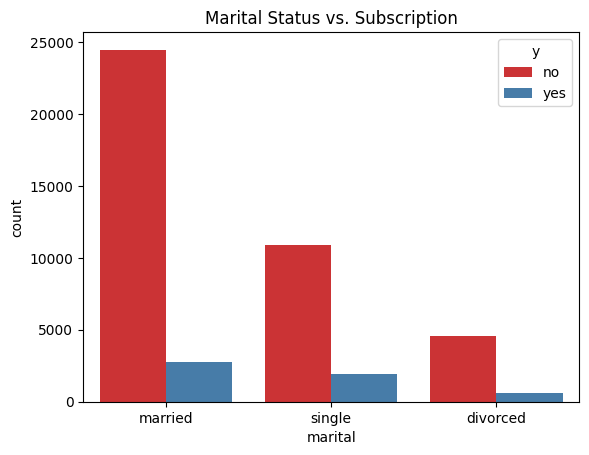

In [22]:

# Marital status
sns.countplot(x='marital', hue='y', data=bank, palette='Set1')
plt.title('Marital Status vs. Subscription')


### Loan

In [79]:
#Jobs Crosstab
pd.crosstab(bank['loan'],bank['y'],normalize = 0 )   # 0 = row/ 1 =column

# Try out other fields as well

y,0,1
loan,,
0,0.873443,0.126557
1,0.933186,0.066814


Customers who do not have a loan appear to have a higher subscription rate compared to those who have a loan.

Text(0.5, 1.0, 'Job vs. Subscription')

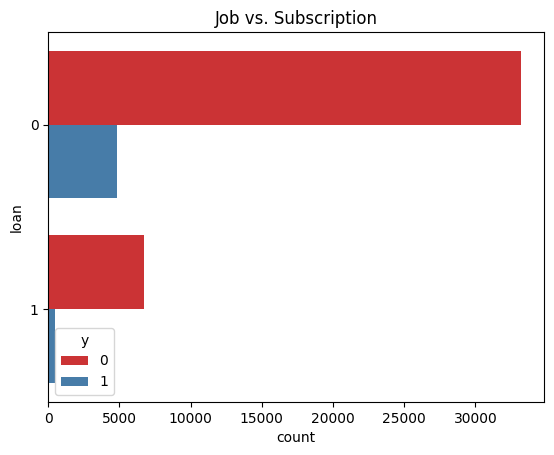

In [78]:
# Look at the frequencies of the loan
sns.countplot(y='loan', hue='y', data=bank, orient='h', palette= 'Set1')
plt.title('Job vs. Subscription')

# Other graphs

Text(0.5, 1.0, 'Age vs balance')

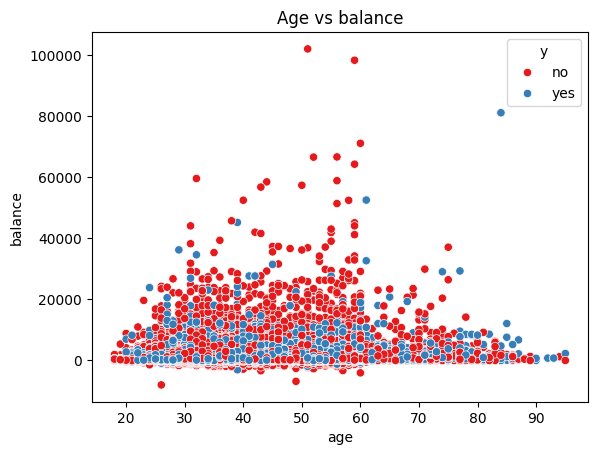

In [24]:
# Scatter plots

sns.scatterplot(data = bank, x= 'age', y = 'balance', hue = 'y',
                palette = 'Set1')
plt.title( 'Age vs balance')

## Modeling

### AB testing using Chi Square

In [25]:

# Create contingency table
contingency_table = pd.crosstab(bank['y'], bank['housing'])

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print results
print("Chi-square value:", chi2)
print("P-value:", p_value)

Chi-square value: 874.822448867983
P-value: 2.918797605076633e-192


In [26]:
# FInd the number of unique values per column
bank.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [27]:
# Identify columns with two categories for Label Encoding

two_category_cols = ['housing', 'default', 'loan', 'y']

In [28]:
# Label Encoding for columns with two categories
le = LabelEncoder()
for col in two_category_cols:
    bank[col] = le.fit_transform(bank[col])

bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [29]:
# Identify non-numeric columns for One-Hot Encoding
non_numeric_cols = bank.select_dtypes(include=['object']).columns

ohe = OneHotEncoder()
X_ohe = ohe.fit_transform(bank[non_numeric_cols]).toarray()
X_ohe_df = pd.DataFrame(X_ohe, columns=ohe.get_feature_names_out(non_numeric_cols))


# Concatenate the encoded features with the original DataFrame
bank_encoded = pd.concat([bank.drop(columns=non_numeric_cols), X_ohe_df], axis=1)





In [30]:
bank_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 79 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  int64  
 1   default              45211 non-null  int64  
 2   balance              45211 non-null  int64  
 3   housing              45211 non-null  int64  
 4   loan                 45211 non-null  int64  
 5   duration             45211 non-null  int64  
 6   campaign             45211 non-null  int64  
 7   pdays                45211 non-null  int64  
 8   previous             45211 non-null  int64  
 9   y                    45211 non-null  int64  
 10  job_admin.           45211 non-null  float64
 11  job_blue-collar      45211 non-null  float64
 12  job_entrepreneur     45211 non-null  float64
 13  job_housemaid        45211 non-null  float64
 14  job_management       45211 non-null  float64
 15  job_retired          45211 non-null 

In [31]:
# Separate features and target variable
X = bank_encoded.drop(columns=['y'])
y = bank_encoded['y']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


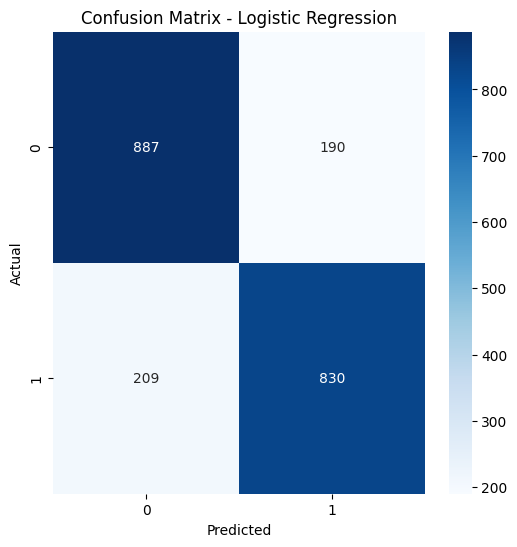

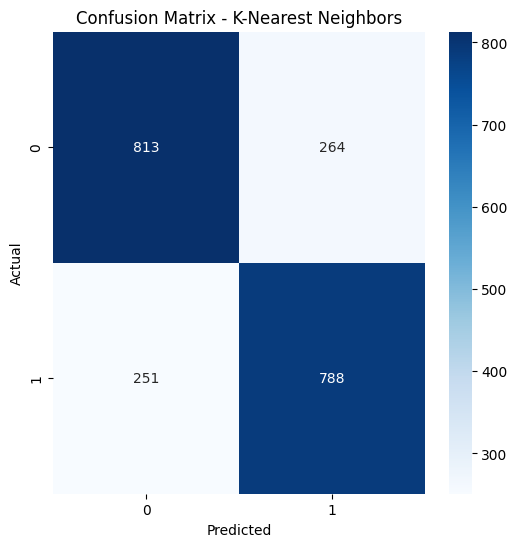

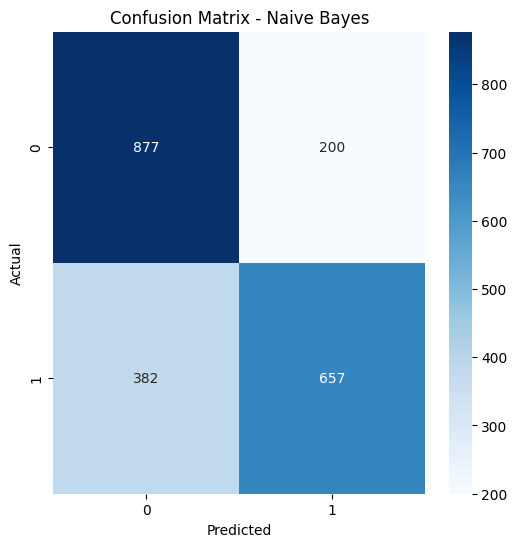

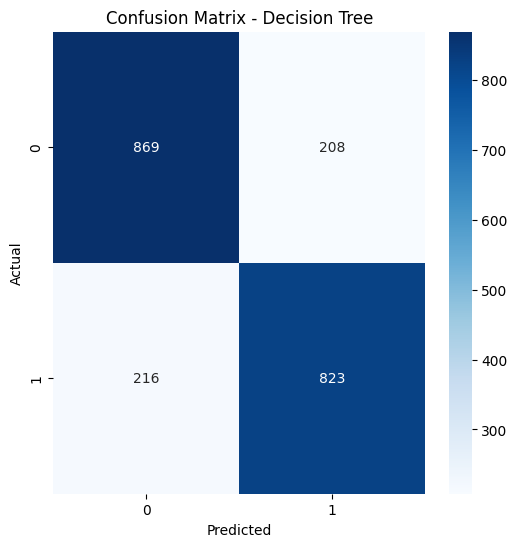

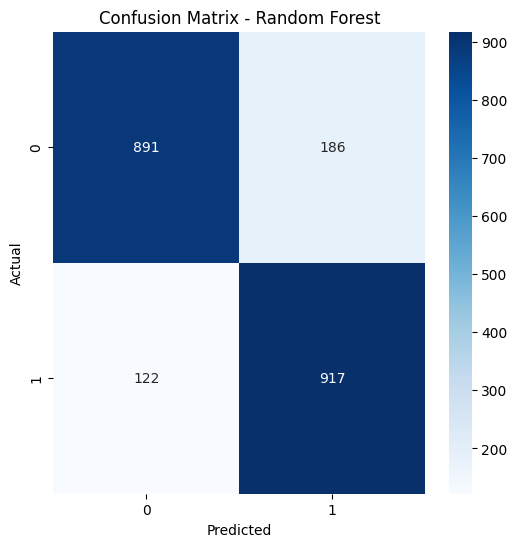

Classification Metrics:

Logistic Regression:
Accuracy: 0.8114
Precision: 0.8137
F1 Score: 0.7988
F1 Score: 0.8062

K-Nearest Neighbors:
Accuracy: 0.7566
Precision: 0.7490
F1 Score: 0.7584
F1 Score: 0.7537

Naive Bayes:
Accuracy: 0.7250
Precision: 0.7666
F1 Score: 0.6323
F1 Score: 0.6930

Decision Tree:
Accuracy: 0.7996
Precision: 0.7983
F1 Score: 0.7921
F1 Score: 0.7952

Random Forest:
Accuracy: 0.8544
Precision: 0.8314
F1 Score: 0.8826
F1 Score: 0.8562


In [41]:
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Calculate classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall =  recall_score(y_test, y_pred)

    # Save results
    results[name] = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy,
        'Precision': precision,
        'F1 Score': f1,
        "Recall" : recall
    }

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Print classification metrics
print("Classification Metrics:")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"F1 Score: {metrics['Recall']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")

These metrics provide a measure of the performance of each classification model in predicting the target variable (y). The metrics include accuracy, precision, and F1 score, which are commonly used to evaluate the effectiveness of classification models.

Based on these metrics, **the Random Forest model has the highest accuracy and F1 score**, indicating that it performs the best among the models evaluated. The Logistic Regression model also performs well, with relatively high accuracy and precision. However, the Naive Bayes model has lower accuracy and F1 score compared to the other models, suggesting that it may not be as effective for this dataset.

In [42]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Function to recommend items based on similarity to a given target value of y
def recommend_similar_items(X, y, target_value, top_n=20):
    # Calculate cosine similarity between each item's y value and the target value
    similarity_scores = cosine_similarity(y.reshape(-1, 1), target_value.reshape(1, -1))

    # Get indices of top n most similar items
    top_indices = similarity_scores.argsort(axis=0)[-top_n:][::-1].squeeze()

    # Return the indices and similarity scores of the top n most similar items
    return top_indices, similarity_scores[top_indices]

# Let's say we want to recommend items similar to a target value of 1 (yes)
target_value = np.array([1])

# Recommend top 5 most similar items
top_indices, similarity_scores = recommend_similar_items(y.values.reshape(-1, 1), y.values, target_value)

# Print the recommended indices and similarity scores
print("Top 5 most similar items:")
for i, (index, score) in enumerate(zip(top_indices, similarity_scores), 1):
    print(f"Item index: {index}, Similarity score: {score}")

# Print the details of the top 5 most similar items
print("\nDetails of the top 5 most similar items:")
bank_encoded.iloc[top_indices]

Top 5 most similar items:
Item index: 10577, Similarity score: [1.]
Item index: 4792, Similarity score: [1.]
Item index: 4763, Similarity score: [1.]
Item index: 4766, Similarity score: [1.]
Item index: 4767, Similarity score: [1.]
Item index: 4772, Similarity score: [1.]
Item index: 4778, Similarity score: [1.]
Item index: 4780, Similarity score: [1.]
Item index: 4783, Similarity score: [1.]
Item index: 4785, Similarity score: [1.]
Item index: 4786, Similarity score: [1.]
Item index: 4789, Similarity score: [1.]
Item index: 4790, Similarity score: [1.]
Item index: 4794, Similarity score: [1.]
Item index: 4820, Similarity score: [1.]
Item index: 4798, Similarity score: [1.]
Item index: 4801, Similarity score: [1.]
Item index: 4803, Similarity score: [1.]
Item index: 4806, Similarity score: [1.]
Item index: 4807, Similarity score: [1.]

Details of the top 5 most similar items:


,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
10577,38,0,298,0,0,147,1,-1,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4792,40,0,858,1,0,173,1,-1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4763,35,0,274,1,0,190,1,-1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4766,32,0,157,1,0,315,1,-1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4767,30,0,347,1,0,225,1,-1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4772,42,0,2309,1,0,64,3,-1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4778,54,0,6102,1,1,86,6,-1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4780,33,0,1349,1,0,120,1,-1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4783,32,0,2976,1,0,174,1,-1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4785,36,0,393,1,1,126,1,-1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


it appears that the top 5 most similar items all have a similarity score of 1. This suggests that they are identical or very similar to the target item.

Here are the indices of the top 5 most similar items:

- Index 10577
- Index 4792
- Index 4763
- Index 4766
- Index 4767

Since all the similarity scores are 1, it indicates that these items are highly similar to the target item.

## Undersampling the no (0) of the target column

Undersampling involves reducing the number of instances in the majority class (in this case, the "no" class) to balance the class distribution. This approach helps mitigate the impact of class imbalance on model performance.
The undersampled dataset likely has a more balanced class distribution compared to the original dataset, which may improve the performance of classification models, particularly in terms of precision, recall, and F1 score for the minority class (in this case, the "yes" class).

In [43]:
# Separate the instances with y=0 and y=1
y_0 = bank_encoded[bank_encoded['y'] == 0]
y_1 = bank_encoded[bank_encoded['y'] == 1]

# Calculate the number of instances in each class
num_instances_y_0 = len(y_0)
num_instances_y_1 = len(y_1)

In [44]:


# Undersample the majority class (y=0) to match the number of instances in the minority class (y=1)
undersampled_y_0 = y_0.sample(n=num_instances_y_1, random_state=42)

# Combine the undersampled majority class with the minority class
balanced_dataset = pd.concat([undersampled_y_0, y_1])

# Shuffle the rows of the balanced dataset
balanced_dataset = balanced_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the class distribution in the balanced dataset
print(balanced_dataset['y'].value_counts())

1    5289
0    5289
Name: y, dtype: int64


We have now balanced the dataset, lets try our analysis

In [45]:
# Separate features and target variable
X = balanced_dataset.drop(columns=['y'])
y = balanced_dataset['y']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


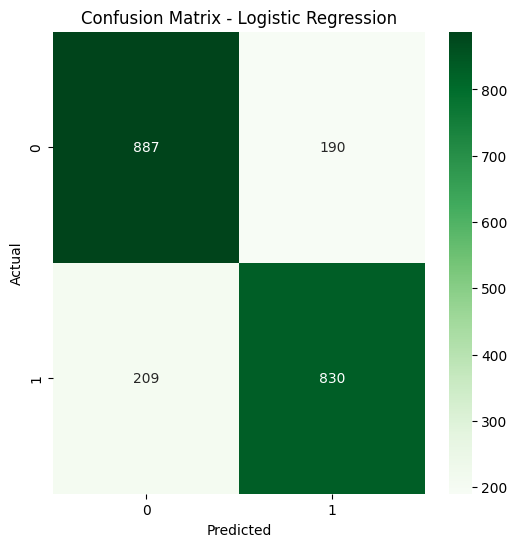

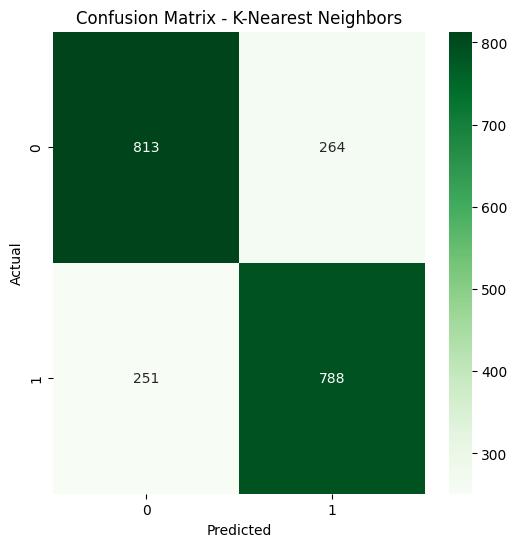

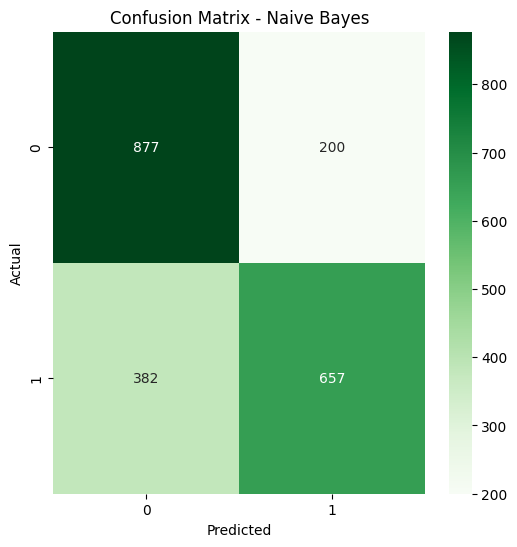

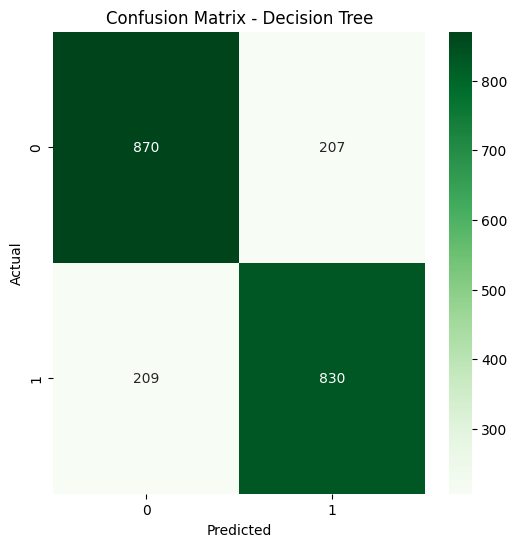

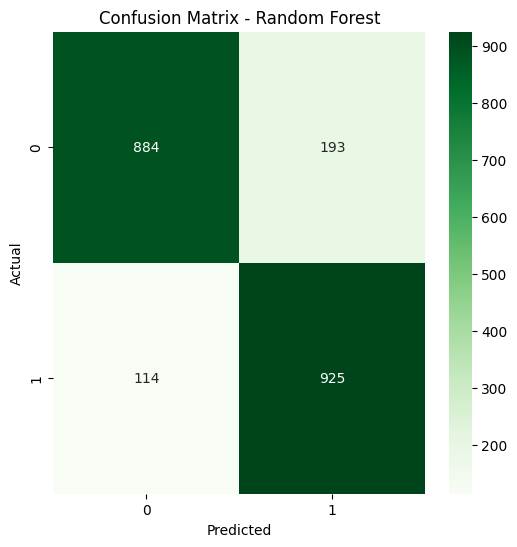

Classification Metrics of the Undersampled dataset:

Logistic Regression:
Accuracy: 0.8114
Precision: 0.8137
Recall: 0.7988
F1 Score: 0.8062

K-Nearest Neighbors:
Accuracy: 0.7566
Precision: 0.7490
Recall: 0.7584
F1 Score: 0.7537

Naive Bayes:
Accuracy: 0.7250
Precision: 0.7666
Recall: 0.6323
F1 Score: 0.6930

Decision Tree:
Accuracy: 0.8034
Precision: 0.8004
Recall: 0.7988
F1 Score: 0.7996

Random Forest:
Accuracy: 0.8549
Precision: 0.8274
Recall: 0.8903
F1 Score: 0.8577


In [46]:
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Calculate classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall =  recall_score(y_test, y_pred)

    # Save results
    results[name] = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy,
        'Precision': precision,
        'F1 Score': f1,
        "Recall" : recall
    }

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Print classification metrics
print("Classification Metrics of the Undersampled dataset:")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")

Across most models, the undersampled dataset tends to exhibit higher precision, recall, and F1 score for the minority class compared to the original dataset. This suggests that undersampling has effectively addressed the issue of class imbalance and improved the model's ability to correctly classify instances of the minority class.

The **Random Forest** model tends to show the most significant improvement in performance on the undersampled dataset compared to the original dataset. This model achieves higher accuracy, precision, recall, and F1 score for both classes, indicating that it effectively leverages the balanced class distribution to make more accurate predictions.

In [47]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Function to recommend items based on similarity to a given target value of y
def recommend_similar_items(X, y, target_value, top_n=5):
    # Calculate cosine similarity between each item's y value and the target value
    similarity_scores = cosine_similarity(y.reshape(-1, 1), target_value.reshape(1, -1))

    # Get indices of top n most similar items
    top_indices = similarity_scores.argsort(axis=0)[-top_n:][::-1].squeeze()

    # Return the indices and similarity scores of the top n most similar items
    return top_indices, similarity_scores[top_indices]

# Let's say we want to recommend items similar to a target value of 1 (yes)
target_value = np.array([1])

# Recommend top 5 most similar items
top_indices, similarity_scores = recommend_similar_items(y.values.reshape(-1, 1), y.values, target_value)

# Print the recommended indices and similarity scores
print("Top 5 most similar items:")
for i, (index, score) in enumerate(zip(top_indices, similarity_scores), 1):
    print(f"Item index: {index}, Similarity score: {score}")

# Print the details of the top 5 most similar items
print("\nDetails of the top 5 most similar items:")
bank_encoded.iloc[top_indices]

Top 5 most similar items:
Item index: 10577, Similarity score: [1.]
Item index: 4792, Similarity score: [1.]
Item index: 4763, Similarity score: [1.]
Item index: 4766, Similarity score: [1.]
Item index: 4767, Similarity score: [1.]

Details of the top 5 most similar items:


,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
10577,38,0,298,0,0,147,1,-1,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4792,40,0,858,1,0,173,1,-1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4763,35,0,274,1,0,190,1,-1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4766,32,0,157,1,0,315,1,-1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4767,30,0,347,1,0,225,1,-1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


The recommender system manages to remain same

## Conclusions

1. *Impact of Imbalance*:
The original dataset's class imbalance negatively affected model performance, particularly for the minority class. Models trained on the imbalanced dataset tended to have lower precision, recall, and F1 score for the minority class
2. *Performance Improvement on Undersampling* :
Undersampling significantly improved model performance, particularly in terms of precision, recall, and F1 score for the minority class.
3. * Age* : Older clients tend to have higher balances, which may indicate higher financial stability and a greater likelihood of subscribing to term deposits.
4. *Other features*:  Certain job types (e.g., management, retired) and education levels (e.g., tertiary) may be associated with higher subscription rates. Positive correlations between certain features (e.g., higher balance, longer duration of last contact) and the target variable suggest that these features may have a significant impact on subscription likelihood.